# Model Selection
In this notebook, we will focus on model selection. We first import all libraries will be using, define some functions and import the dataset we will be using through out the notebook.

In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time


%matplotlib inline
pd.plotting.register_matplotlib_converters()

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE
from sklearn import metrics

sns.set(style = "ticks")

Next, we apply the same transformations we have done in Load & Cleanse notebook to get the dataframe ready.

In [348]:
file_path = "../data/data.csv"
data = pd.read_csv(file_path, index_col = "consumer_id")

cols_with_na = [col for col in data.columns if data[col].isnull().any()]

data.drop(cols_with_na + ["account_status"], axis = 1, inplace = True)

## Clustering and Labeling

The sample data is not labeled. So, we cannot use any supervised algorithms. Therefore, we will first label the data using a clustering algorithm and then use a tree-based classification algorithm to train a classification model. This way, we will be able to classify unseen data based on the classification model we have built.

In this section we will try a couple of different approaches. Namely, we will use _k_-means, DBSCAN and LOF to get clusters. Although LOF is not really a clustering method, I think it will be useful in our case for identifying outliers and label them. We will use the silhouette score to measure the efficiency of the algorithm in identifying the clusters.

We will use the following function that will help us to visualise the clusters with t-SNE.

In [350]:
def tsne_plot(d, m, n_color):
    """
    Function to visualise clusters with t-SNE for a given dataset d and model m
    """
    d_copy = d.copy()
    
    d_copy["tsne-d1"] = m[:, 0]
    d_copy["tsne-d2"] = m[:, 1]

    plt.figure(figsize=(10,10))
    sns.scatterplot(
        x="tsne-d1", y="tsne-d2",
        palette=sns.color_palette("hls", n_color),
        hue = "label",
        data=d_copy,
        legend="full",
        alpha=0.3
    )

### _k_-means
We first will standardise the dataset using `StandardScaler` module. Then, we will build a _k_-means clustering with `n_clusters=2`. We also keep original index and column names for demonstration purposes.

In [351]:
n_clusters = 2
data_norm_k = pd.DataFrame(MinMaxScaler().fit_transform(data), index = data.index)
k_means = KMeans(n_clusters=n_clusters, random_state=123).fit_predict(data_norm_k)
data_norm_k.columns = data.columns
data_norm_k["label"] = k_means + 1
data_norm_k["label"] = data_norm_k["label"].apply(lambda i: str(i))
data_norm_k.head()

,has_gender,has_first_name,has_last_name,has_email,has_dob,account_age,account_last_updated,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_rides,total_offer_rides,avg_claims,min_claims,max_claims,total_offers_claimed,label
consumer_id,,,,,,,,,,,,,,,,,
1284b75c-ecae-4015-8e3d-359c0347ede8,0.0,1.0,1.0,1.0,0.0,0.029474,0.071429,0.0,0.153846,0.032787,0.291667,0.029568,0.0,0.0,0.0,0.0,2
128af162-d2c3-4fe4-986c-359c8bdc6c04,0.0,1.0,1.0,1.0,0.0,0.023158,0.071429,0.0,0.153846,0.114754,0.166667,0.033116,0.0,0.0,0.0,0.0,2
12aada5e-36eb-4e9e-8d62-359c076c1b40,0.0,1.0,1.0,1.0,0.0,0.029474,0.071429,0.0,0.153846,0.049180,0.333333,0.107037,0.0,0.0,0.0,0.2,2
12c2e02f-bc79-4048-83ba-359cd3280dcf,0.0,1.0,1.0,1.0,0.0,0.021053,0.071429,0.0,0.153846,0.098361,0.125000,0.031934,0.0,0.0,0.0,0.0,2
12fabdf0-0582-489e-a6d3-35509ab8ae6f,1.0,1.0,1.0,1.0,1.0,0.837895,0.000000,0.0,0.230769,0.081967,0.250000,0.047901,0.0,0.0,0.0,0.2,1


Let's calculate the silhouette score. Yo can see that silhouette score is pretty low.

In [352]:
score = metrics.silhouette_score(data_norm_k[data.columns], data_norm_k["label"])
print("For n_clusters = {}, silhouette score is {}.".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5346240793329303.


Next, we will visualise the clusters using t-SNE. We already have function defined at the beginning of this section to plot the result. We reduce the dimensionality first and then plot the clusters. From the plot below, it is clear that we cannot separate the clusters properly.

t-SNE done! Time elapsed: 15.279781818389893 seconds


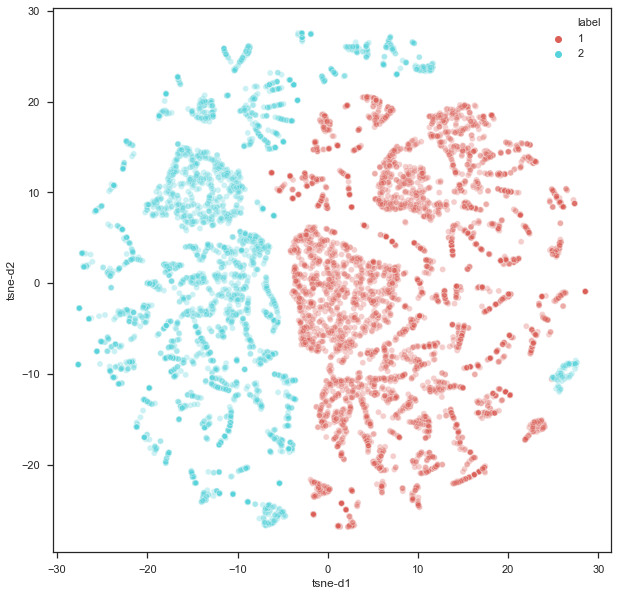

In [353]:
start_time = time.time()
tsne = TSNE(n_components = 2, perplexity = 30, n_iter = 500, verbose = 0, random_state = 123, learning_rate=50)
tsne_results = tsne.fit_transform(data_norm_k[data.columns])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-start_time))

tsne_plot(data_norm_k, tsne_results, 2)
#plt.savefig("p_kmeans.png")

### DBSCAN
We will follow a similar approach to the previous section. We will not be able to set the number of clusters here since DBSCAN finds clusters automatically.

In [354]:
data_norm_db = pd.DataFrame(MinMaxScaler().fit_transform(data), index = data.index)
db_scan = DBSCAN(eps = 0.99, min_samples = 100, metric = "euclidean", n_jobs = -1).fit(data_norm_db)
data_norm_db.columns = data.columns
data_norm_db["label"] = db_scan.labels_
data_norm_db["label"] = data_norm_db["label"].apply(lambda i: str(i))
data_norm_db.head()

,has_gender,has_first_name,has_last_name,has_email,has_dob,account_age,account_last_updated,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_rides,total_offer_rides,avg_claims,min_claims,max_claims,total_offers_claimed,label
consumer_id,,,,,,,,,,,,,,,,,
1284b75c-ecae-4015-8e3d-359c0347ede8,0.0,1.0,1.0,1.0,0.0,0.029474,0.071429,0.0,0.153846,0.032787,0.291667,0.029568,0.0,0.0,0.0,0.0,0
128af162-d2c3-4fe4-986c-359c8bdc6c04,0.0,1.0,1.0,1.0,0.0,0.023158,0.071429,0.0,0.153846,0.114754,0.166667,0.033116,0.0,0.0,0.0,0.0,0
12aada5e-36eb-4e9e-8d62-359c076c1b40,0.0,1.0,1.0,1.0,0.0,0.029474,0.071429,0.0,0.153846,0.049180,0.333333,0.107037,0.0,0.0,0.0,0.2,0
12c2e02f-bc79-4048-83ba-359cd3280dcf,0.0,1.0,1.0,1.0,0.0,0.021053,0.071429,0.0,0.153846,0.098361,0.125000,0.031934,0.0,0.0,0.0,0.0,0
12fabdf0-0582-489e-a6d3-35509ab8ae6f,1.0,1.0,1.0,1.0,1.0,0.837895,0.000000,0.0,0.230769,0.081967,0.250000,0.047901,0.0,0.0,0.0,0.2,1


As you can see we have very similar silhouette score to _k_-means model.

In [355]:
score_db = metrics.silhouette_score(data_norm_db[data.columns], data_norm_db["label"])
n_clusters_ = len(set(db_scan.labels_)) - (1 if -1 in db_scan.labels_ else 0)
print("For n_clusters = {}, silhouette score is {}.".format(n_clusters_, score_db))

For n_clusters = 4, silhouette score is 0.5931621877614222.


We have already calculated t-SNE. So, we will simply use the already calculated one. And, it is apparent, DBSCAN is finding more than 2 clusters with very few outliers.

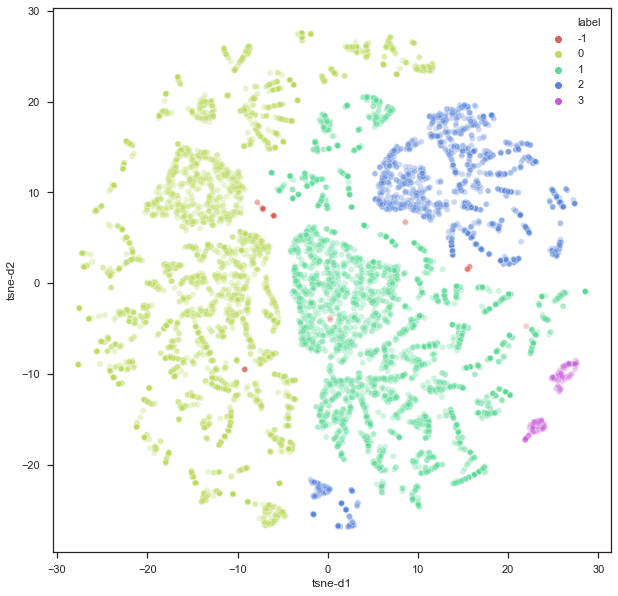

In [356]:
tsne_plot(data_norm_db, tsne_results, n_clusters_ + 1)

### Local Outlier Factor (LOF)
LOF uses density-based outlier detection to identify local outliers. A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors. Standardising the dataset for LOF does not change the result as it utilises Manhattan metric. But, we will use standardasiation so that t-SNE will produce similar plots. 

In [357]:
#data_lof = data.copy()
data_lof = pd.DataFrame(MinMaxScaler().fit_transform(data), index = data.index)
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.1).fit_predict(data_lof)
data_lof.columns = data.columns
data_lof["label"] = lof
data_lof["label"] = data_lof["label"].apply(lambda i: str(i))
data_lof.head()

,has_gender,has_first_name,has_last_name,has_email,has_dob,account_age,account_last_updated,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_rides,total_offer_rides,avg_claims,min_claims,max_claims,total_offers_claimed,label
consumer_id,,,,,,,,,,,,,,,,,
1284b75c-ecae-4015-8e3d-359c0347ede8,0.0,1.0,1.0,1.0,0.0,0.029474,0.071429,0.0,0.153846,0.032787,0.291667,0.029568,0.0,0.0,0.0,0.0,1
128af162-d2c3-4fe4-986c-359c8bdc6c04,0.0,1.0,1.0,1.0,0.0,0.023158,0.071429,0.0,0.153846,0.114754,0.166667,0.033116,0.0,0.0,0.0,0.0,1
12aada5e-36eb-4e9e-8d62-359c076c1b40,0.0,1.0,1.0,1.0,0.0,0.029474,0.071429,0.0,0.153846,0.049180,0.333333,0.107037,0.0,0.0,0.0,0.2,1
12c2e02f-bc79-4048-83ba-359cd3280dcf,0.0,1.0,1.0,1.0,0.0,0.021053,0.071429,0.0,0.153846,0.098361,0.125000,0.031934,0.0,0.0,0.0,0.0,1
12fabdf0-0582-489e-a6d3-35509ab8ae6f,1.0,1.0,1.0,1.0,1.0,0.837895,0.000000,0.0,0.230769,0.081967,0.250000,0.047901,0.0,0.0,0.0,0.2,1


t-SNE done! Time elapsed: 18.49241876602173 seconds


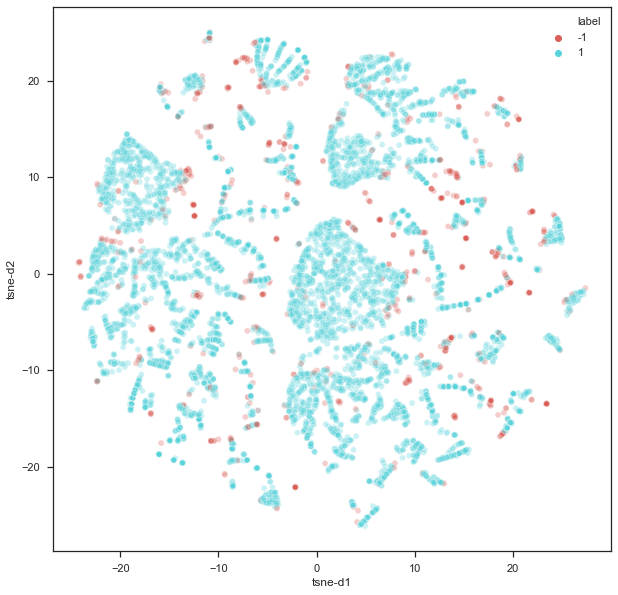

In [358]:
start_time = time.time()
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 500, verbose = 0, random_state = 123, learning_rate=50)
tsne_results_lof = tsne.fit_transform(data_lof[data.columns])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-start_time))

tsne_plot(data_lof, tsne_results_lof, 2)
plt.savefig("p_lot.png")

## Conclusions


In [364]:
(data_norm_k["label"] == "2").sum() / len(data_norm_k["label"])

0.4433

In [369]:
(data_lof["label"] == "-1").sum() / len(data_lof["label"]))

0.0999